In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [3]:
#Data Visualisation (Line Chart)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [8]:
data=pd.read_csv("employee.csv")


In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
data=data.loc[:199,:]
data.shape

(200, 35)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       200 non-null    int64 
 1   Attrition                 200 non-null    object
 2   BusinessTravel            200 non-null    object
 3   DailyRate                 200 non-null    int64 
 4   Department                200 non-null    object
 5   DistanceFromHome          200 non-null    int64 
 6   Education                 200 non-null    int64 
 7   EducationField            200 non-null    object
 8   EmployeeCount             200 non-null    int64 
 9   EmployeeNumber            200 non-null    int64 
 10  EnvironmentSatisfaction   200 non-null    int64 
 11  Gender                    200 non-null    object
 12  HourlyRate                200 non-null    int64 
 13  JobInvolvement            200 non-null    int64 
 14  JobLevel                  

In [14]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
195,37,No,Travel_Rarely,290,Research & Development,21,3,Life Sciences,1,267,...,1,80,1,8,3,2,8,7,1,7
196,35,No,Travel_Frequently,138,Research & Development,2,3,Medical,1,269,...,4,80,0,10,5,3,6,2,1,2
197,42,No,Non-Travel,926,Research & Development,21,2,Medical,1,270,...,2,80,1,11,5,3,5,3,0,2
198,38,No,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,271,...,2,80,0,14,3,3,1,0,0,0
199,38,No,Travel_Rarely,1084,Research & Development,29,3,Technical Degree,1,273,...,1,80,1,9,3,1,7,7,1,7


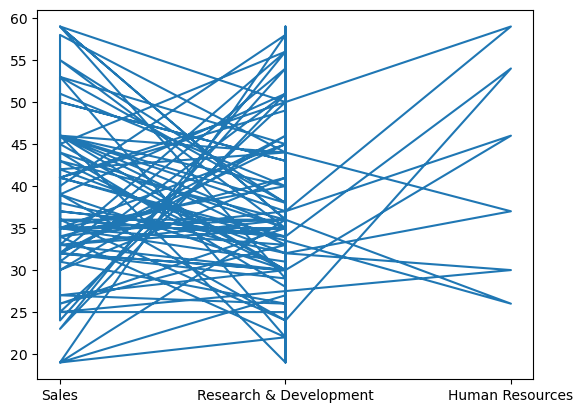

In [18]:
#Line Plots
plt.plot(data["Department"], 
    data["Age"])


<Axes: xlabel='Department'>

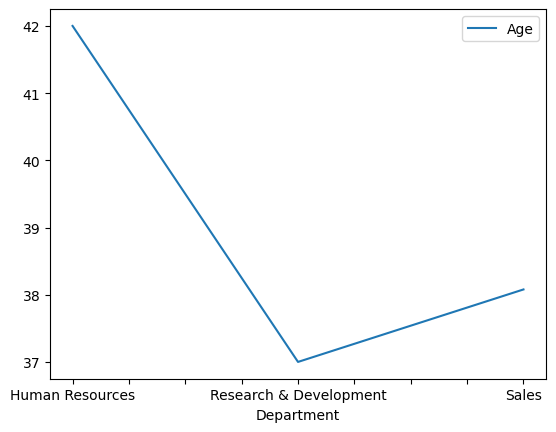

In [20]:
x=data.pivot_table(index="Department",
                   values="Age",
                   aggfunc="mean")
x.plot(kind="line")

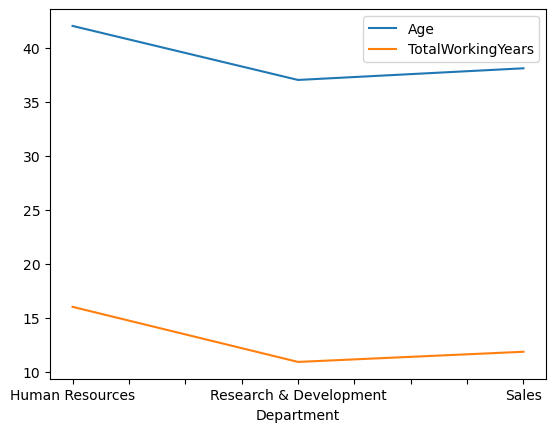

In [26]:
x=data.pivot_table(index="Department",
                   values=["Age", "TotalWorkingYears"],
                   aggfunc="mean").plot(kind="line")

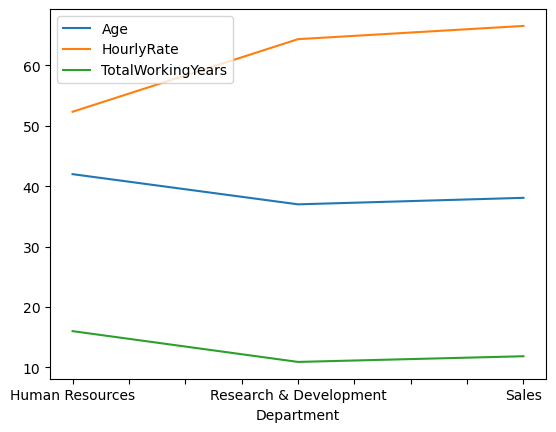

In [30]:
x=data.pivot_table(index="Department",
                   values=["Age", "TotalWorkingYears", "HourlyRate"],
                   aggfunc="mean").plot(kind="line")

<Axes: xlabel='Department'>

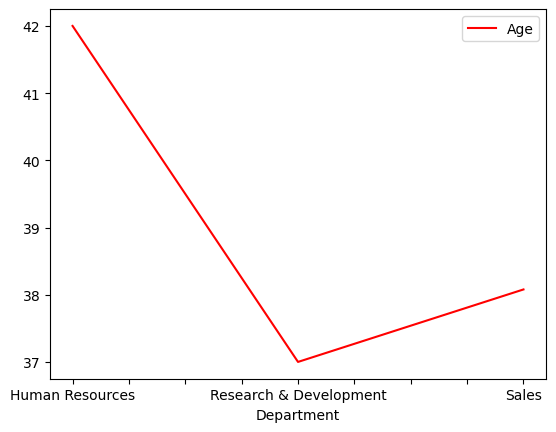

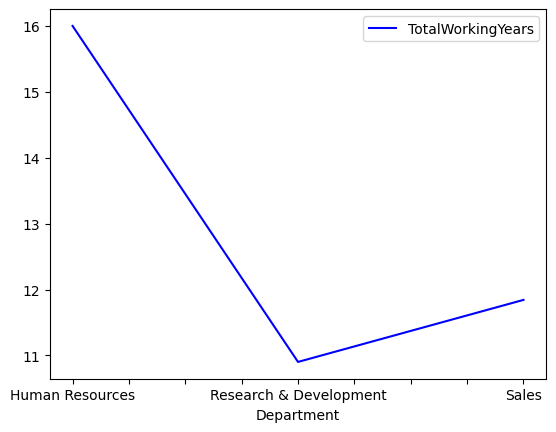

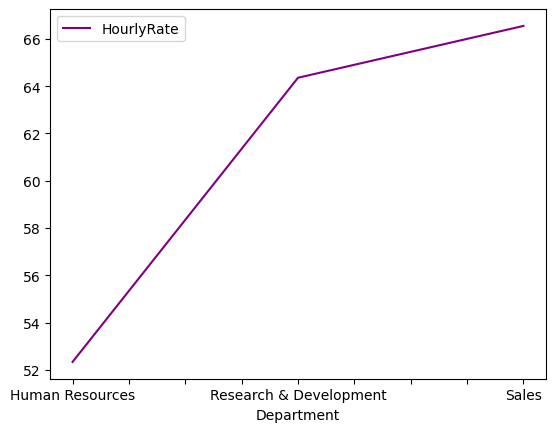

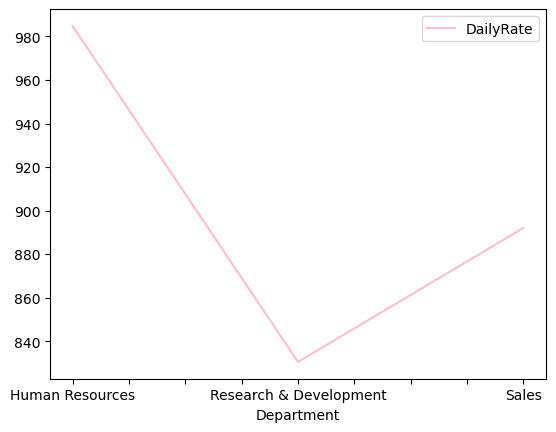

In [34]:
data.pivot_table(index="Department",
                 values=["Age"],
                 aggfunc="mean").plot(kind="line", color="red")
data.pivot_table(index="Department",
                 values=["TotalWorkingYears"],
                 aggfunc="mean").plot(kind="line", color="blue")
data.pivot_table(index="Department",
                 values=["HourlyRate"],
                 aggfunc="mean").plot(kind="line", color="purple")
data.pivot_table(index="Department",
                 values=["DailyRate"],
                 aggfunc="mean").plot(kind="line", color="pink")

Text(0.5, 0.98, 'Line Plots Using Subplots')

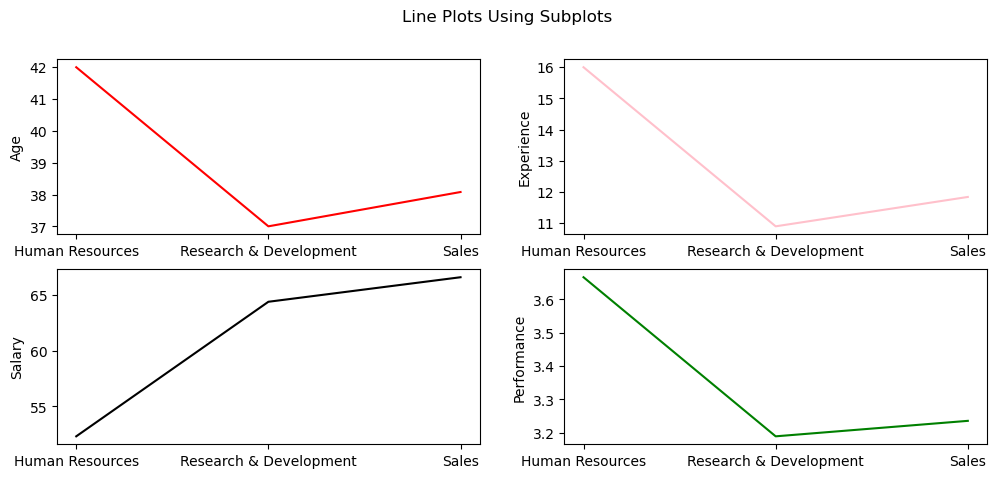

In [37]:
plt.rcParams["figure.figsize"]=(12,5)
plt.subplot(221)
x=data.pivot_table(index="Department",
                   values=["Age"],
                   aggfunc="mean")
plt.plot(x,color="red")
plt.ylabel("Age")

plt.subplot(222)
y=data.pivot_table(index="Department",
                   values=["TotalWorkingYears"],
                   aggfunc="mean")
plt.plot(y,color="pink")
plt.ylabel("Experience")

plt.subplot(223)
z=data.pivot_table(index="Department",
                   values=["HourlyRate"],
                   aggfunc="mean")
plt.plot(z,color="black")
plt.ylabel("Salary")

plt.subplot(224)
a=data.pivot_table(index="Department",
                   values=["PerformanceRating"],
                   aggfunc="mean")
plt.plot(a,color="green")
plt.ylabel("Performance")
plt.suptitle("Line Plots Using Subplots")

Text(0, 0.5, 'Performance')

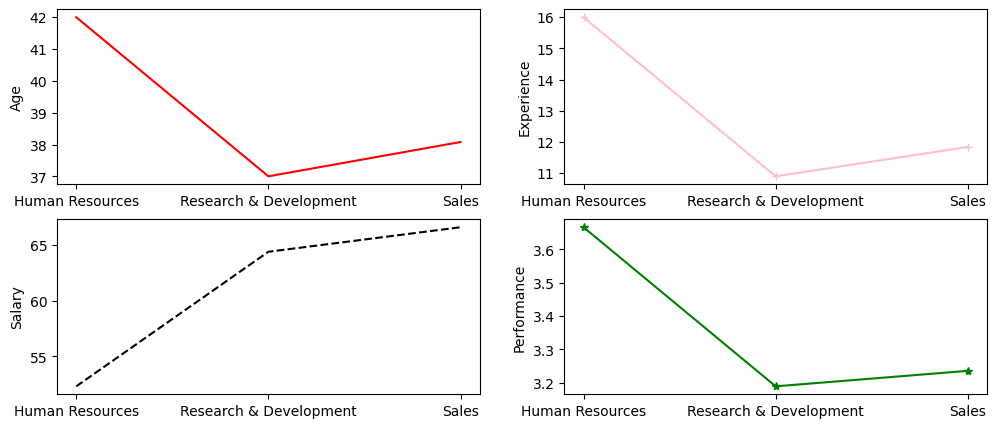

In [38]:
plt.rcParams["figure.figsize"]=(12,5)
plt.subplot(221)
x=data.pivot_table(index="Department",
                   values=["Age"],
                   aggfunc="mean")
plt.plot(x,color="red")
plt.ylabel("Age")

plt.subplot(222)
y=data.pivot_table(index="Department",
                   values=["TotalWorkingYears"],
                   aggfunc="mean")
plt.plot(y,"-+",color="pink")
plt.ylabel("Experience")

plt.subplot(223)
z=data.pivot_table(index="Department",
                   values=["HourlyRate"],
                   aggfunc="mean")
plt.plot(z,"--",color="black")
plt.ylabel("Salary")

plt.subplot(224)
a=data.pivot_table(index="Department",
                   values=["PerformanceRating"],
                   aggfunc="mean")
plt.plot(a,"-*", color="green")
plt.ylabel("Performance")

In [39]:
# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# Median Python Developer Salaries by Age

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

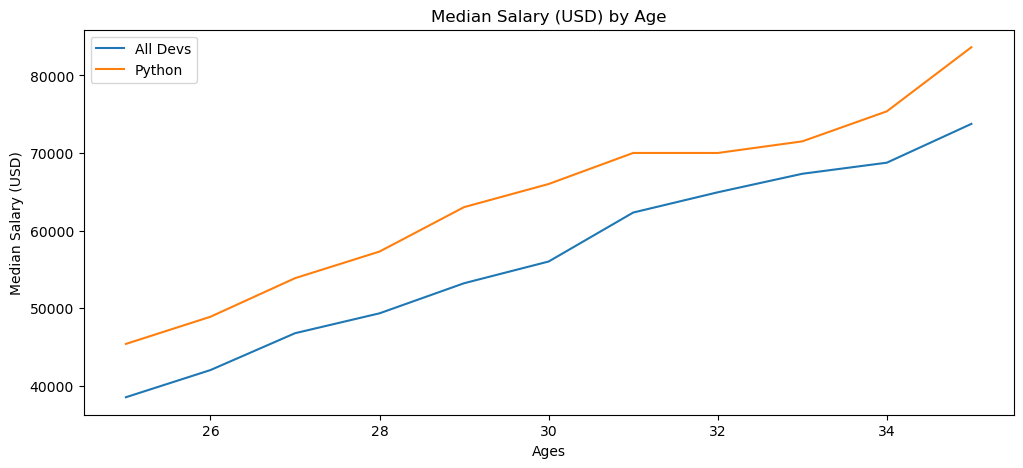

In [40]:
plt.plot(ages_x, dev_y, label='All Devs')
plt.plot(ages_x, py_dev_y, label='Python')

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()
# adding legend
# method 1
# plt.legend(['All Devs', 'Python'])
# method 2 - pass a label argument to plot

In [43]:
#character description
"""". point marker
, pixel marker
o circle marker
v triangle_down marker
^ triangle_up marker
< triangle_left marker
> triangle_right marker
1 tri_down marker
2 tri_up marker
3 tri_left marker
4 tri_right marker
s square marker
p pentagon marker
***** star marker
h hexagon1 marker
H hexagon2 marker
+ plus marker
x x marker
D diamond marker
d thin_diamond marker
' vline marker
_ hline marker"""

'". point marker\n, pixel marker\no circle marker\nv triangle_down marker\n^ triangle_up marker\n< triangle_left marker\n> triangle_right marker\n1 tri_down marker\n2 tri_up marker\n3 tri_left marker\n4 tri_right marker\ns square marker\np pentagon marker\n***** star marker\nh hexagon1 marker\nH hexagon2 marker\n+ plus marker\nx x marker\nD diamond marker\nd thin_diamond marker\n\' vline marker\n_ hline marker'

In [44]:
#Line Styles
"""character description
- solid line style
-- dashed line style
-. dash-dot line style
: dotted line style
Example format strings:
b blue markers with default shape
or red circles
-g green solid line
-- dashed line with default color
^k: black triangle_up markers connected by a dotted line"""

'character description\n- solid line style\n-- dashed line style\n-. dash-dot line style\n: dotted line style\nExample format strings:\nb blue markers with default shape\nor red circles\n-g green solid line\n-- dashed line with default color\n^k: black triangle_up markers connected by a dotted line'

In [45]:
#Colors
"""The supported color abbreviations are the single letter codes
character color
b blue
g green
r red
c cyan
m magenta
y yellow
k black
w white"""

'The supported color abbreviations are the single letter codes\ncharacter color\nb blue\ng green\nr red\nc cyan\nm magenta\ny yellow\nk black\nw white'

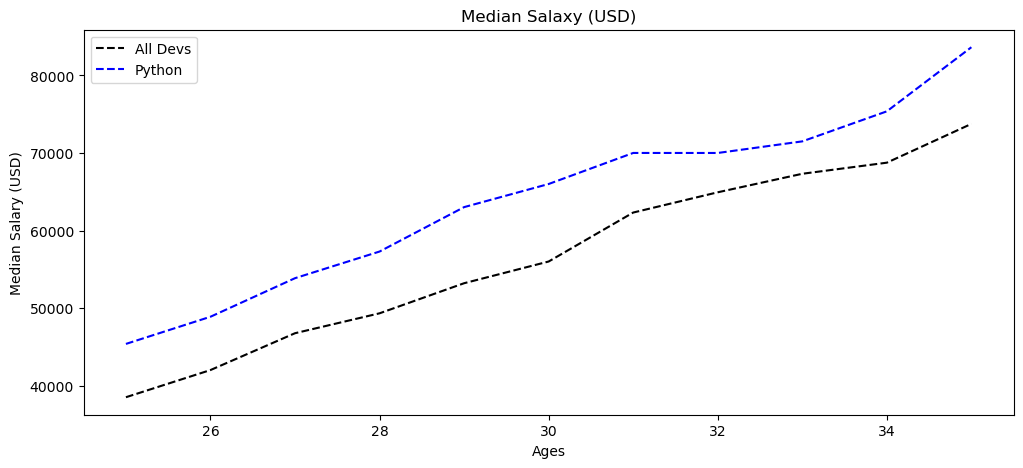

In [49]:
#Change Formatting of the plot
#Method-1
plt.plot(ages_x, dev_y, "k--", label="All Devs")
plt.plot(ages_x, py_dev_y, "b--", label="Python")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salaxy (USD)")
plt.legend()

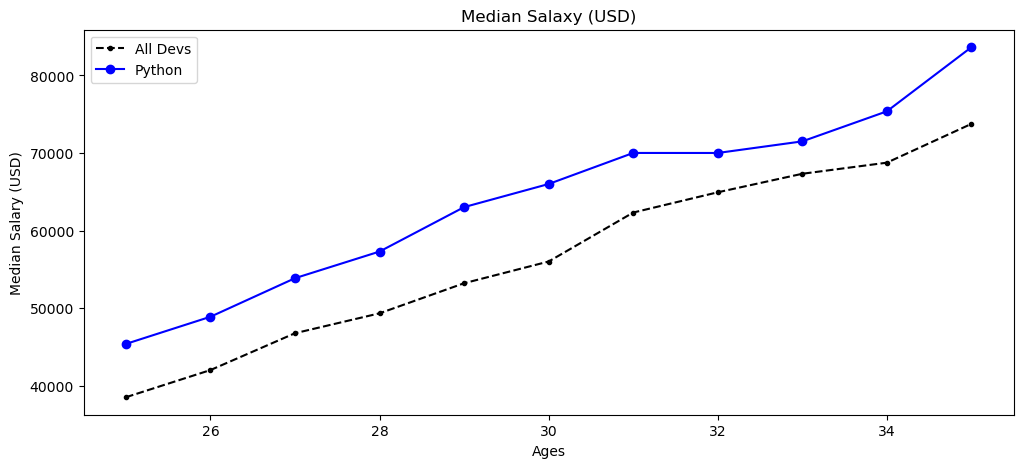

In [50]:
plt.plot(ages_x, dev_y, color="k", linestyle="--", marker=".", label="All Devs")
plt.plot(ages_x, py_dev_y, color="b", marker="o",label="Python")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salaxy (USD)")
plt.legend()

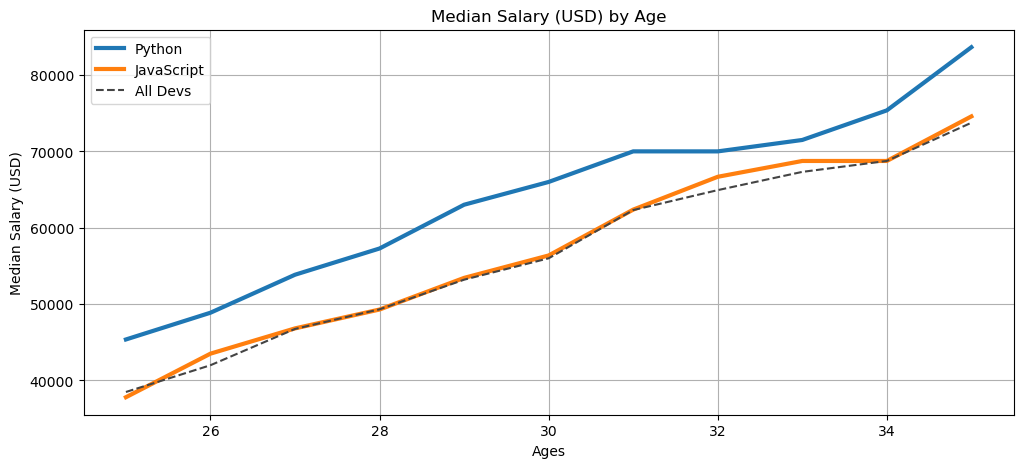

<Figure size 1200x500 with 0 Axes>

In [56]:
# using hexadecimal value for colors and linewidth

plt.plot(ages_x, py_dev_y, linewidth=3, label='Python')

plt.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')

plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()

# adding a grid
plt.grid(True)

# Automatically adjust subplot parameters to give specified padding.
#plt.tight_layout()
plt.show()

plt.savefig("Name.jpg")